In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from numpy import pi

def knn(X, y, k):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    h = .02  # step size in the mesh
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #将meshgrid转换为[x,y]的坐标
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)"
              % (k))
    
    plt.show()
    
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
y = np.array([-1, -1, -1, -1, 1, 1, 1])

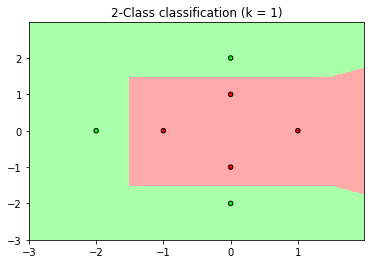

In [15]:
knn(X, y, 1)

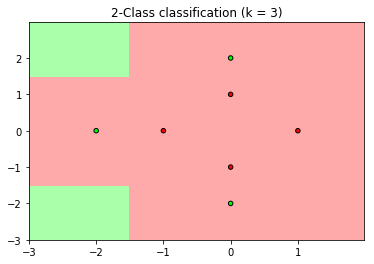

In [16]:
knn(X, y, 3)

进行特征转换

In [86]:
def knn_with_transform(X, Xtrans, y, k):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    h = .02  # step size in the mesh
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(Xtrans, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx1 = np.sqrt(xx*xx + yy*yy)
    yy1 = np.arctan(yy//(xx + 10**(-8)))
    #将meshgrid转换为[x,y]的坐标
    Z = clf.predict(np.c_[xx1.ravel(), yy1.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    #plt.xlim(xx.min() , xx.max() )
    #plt.ylim(yy.min() , yy.max() )
    plt.title("2-Class classification (k = %i)"
              % (k))
    
    plt.show()

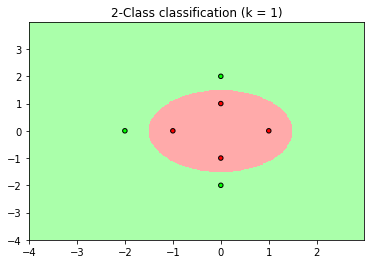

In [87]:
knn_with_transform(X, Z, y, 1)

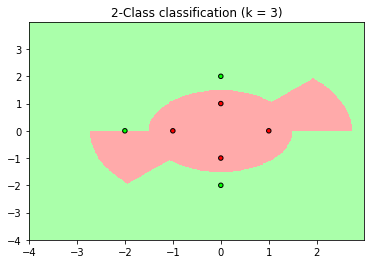

In [88]:
knn_with_transform(X, Z, y, 3)

In [98]:
X = np.array([[1, 0], [0, 1], [0, -1], [-1, 0], [0, 2], [0, -2], [-2, 0]])
Y = np.array([-1, -1, -1, -1, 1, 1, 1])

x = np.array([[np.mean(X[Y>0][:, 0]), np.mean(X[Y>0][:, 1])], [np.mean(X[Y<0][:, 0]), np.mean(X[Y<0][:, 1])]])
y = np.array([1, -1])

In [194]:
def knn_condense(X, X1, y, y1, k):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    
    h = .02  # step size in the mesh
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
    y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #将meshgrid转换为[x,y]的坐标
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)"
              % (k))
    
    plt.show()

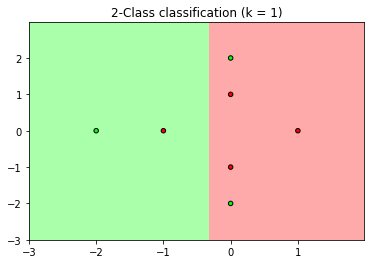

In [195]:
knn_condense(x, X, y, Y, 1)

error为3/7

写一个处理函数

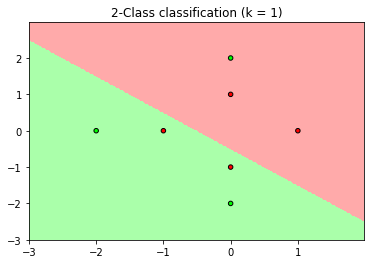

In [198]:
def f(x):
    while(len(x) >1):
        d = float('inf')
        n = len(x)
        k = 0
        l = 0
        for i in range(n):
            for j in range(i+1, n):
                d1 = np.sum((x[i] - x[j])**2)
                if(d > d1):
                    d = d1
                    k = i
                    l = j
        data = (x[k] + x[l])/2
        x = np.delete(x, k, axis = 0)
        x = np.delete(x, l-1, axis = 0)
        x = np.append(x, data.reshape(-1, 2), axis = 0)
    return x[0]

x1 = X[Y>0]
x2 = X[Y<0]

data = np.array([f(x1), f(x2)])
label = [1, -1]

knn_condense(data, X, label, Y, 1)

error为3/7

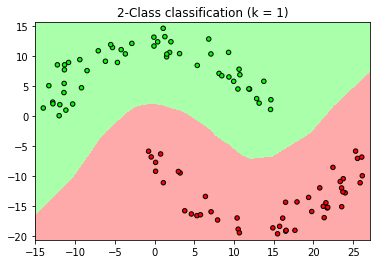

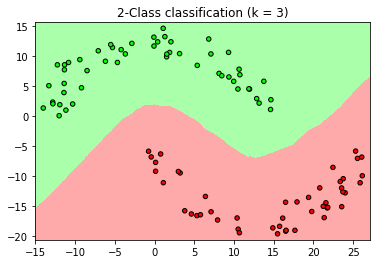

In [199]:
#Step1 产生数据
#参数
rad=10
thk=5
sep=5

#n为产生点的个数,x1,y1为上半个圆环的坐标
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    #上半个圆的圆心
    X1=x1
    Y1=y1

    #下半个圆的圆心
    X2=X1+rad+thk/2
    Y2=Y1-sep
    
    #上半个圆环的点
    top=[]
    #下半个圆环的点
    bottom=[]
    
    #后面要用到的参数
    r1=rad+thk
    r2=rad
    
    cnt=1
    while(cnt<=n):
        #产生均匀分布的点
        x=np.random.uniform(-r1,r1)
        y=np.random.uniform(-r1,r1)
        
        d=x**2+y**2
        if(d>=r2**2 and d<=r1**2):
            if (y>0):
                top.append([X1+x,Y1+y])
                cnt+=1
            else:
                bottom.append([X2+x,Y2+y])
                cnt+=1
        else:
            continue

    return top,bottom

#产生数据
top, bottom = generatedata(rad,thk,sep,100)
X = np.append(top, bottom, axis = 0)
y = np.array([1]*len(top) + [-1] * len(bottom))

knn(X, y, 1)
knn(X, y, 3)